<a href="https://colab.research.google.com/github/hemareddyyanala/HemaReddy_INFO5731_Fall2024/blob/main/Yanala_Hema_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [1]:
# Write your code here
# Importing TfidfVectorizer for converting text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing functions for train-test splitting and cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Importing evaluation metrics for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importing various classification algorithms
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier

#importing XGBoost classifier
from xgboost import XGBClassifier

#import Word2Vec for training word embeddings
from gensim.models import Word2Vec

#import numpy for numerical operations
import numpy as np

In [2]:
# Defining function to load data from a file
def loading_data(file_path):
    #opening the file in read mode with UTF-8 encoding
    with open(file_path, 'r', encoding='utf-8') as file:
        # Reading lines, split by first space and strip newlines
        data = [line.strip().split(' ', 1) for line in file]
    #unzipping the data into labels (first part) and reviews (second part), converting labels to integers
    labels, reviews = zip(*[(int(line[0]), line[1]) for line in data])
    #returning labels and reviews
    return labels, reviews

# Loading training labels and reviews from the training data file
train_labels, train_reviews = loading_data('stsa-train.txt')

# Loading testing labels and reviews from the testing data file
test_labels, test_reviews = loading_data('stsa-test.txt')


In [3]:
import re  # Importing the regular expression module

# Defining a function to clean text by removing special characters and converting to lowercase
def cleaning_text(text):
    # Removing special characters, punctuation, and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Converting the text to lowercase
    text = text.lower()
    #returning the cleaned text
    return text

# Cleaning the training reviews by applying clean_text function
cleaned_train_reviews = [cleaning_text(review) for review in train_reviews]

# Cleaning the test reviews by applying clean_text function
cleaned_test_reviews = [cleaning_text(review) for review in test_reviews]

#defining a function to tokenize text (split into words)
def tokenize_text(reviews):
    # Tokenizing each review by splitting it into words
    tokenized_reviews = [review.split() for review in reviews]
    # Returning the tokenized reviews
    return tokenized_reviews

#tokenize the cleaned training reviews
tokenized_train_reviews = tokenize_text(cleaned_train_reviews)

#tokenize the cleaned test reviews
tokenized_test_reviews = tokenize_text(cleaned_test_reviews)

# Defining a function to build a vocabulary from tokenized reviews
def build_vocabulary(tokenized_reviews):
    vocabulary = set()  # Initialize an empty set for vocabulary
    # Adding each word in the reviews to the vocabulary
    for review in tokenized_reviews:
        vocabulary.update(review)
    # Returning the vocabulary
    return vocabulary

# Building vocabulary for the training reviews
vocabulary_train = build_vocabulary(tokenized_train_reviews)

# Building vocabulary for the test reviews
vocabulary_test = build_vocabulary(tokenized_test_reviews)

# Defining a function to encode text based on a given vocabulary
def encode_text(tokenized_reviews, vocabulary):
    # Creating a dictionary mapping each word to a unique index
    word_to_index = {word: i for i, word in enumerate(vocabulary)}
    # Encoding each review by replacing words with their corresponding index from the vocabulary
    encoded_reviews = [[word_to_index[word] for word in review if word in word_to_index] for review in tokenized_reviews]
    # Returning the encoded reviews
    return encoded_reviews

#encoding the training reviews using the training vocabulary
encoded_train_reviews = encode_text(tokenized_train_reviews, vocabulary_train)

#encoding the test reviews using the test vocabulary
encoded_test_reviews = encode_text(tokenized_test_reviews, vocabulary_test)


In [4]:
# Splitting data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_reviews, train_labels, test_size=0.2, random_state=42)  # Split data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Split training data further into training and validation sets

# Defining models
models = {
    "MultinomialNB": MultinomialNB(),  # Naive Bayes classifier
    "SVM": SVC(),  # Support Vector Machine classifier
    "KNN": KNeighborsClassifier(),  # K-Nearest Neighbors classifier
    "DecisionTree": DecisionTreeClassifier(),  # Decision Tree classifier
    "RandomForest": RandomForestClassifier(),  # Random Forest classifier
    "XGBoost": XGBClassifier()  # XGBoost classifier
}

# Training and evaluate each model
for model_name, model in models.items():  # Iterating through each model
    print(f"Starting evaluation for the model: {model_name}")
    if model_name == "Word2Vec":  # Special handling for Word2Vec
        # Training Word2Vec model
        word2vec_model = Word2Vec(X_train, vector_size=100, window=5, min_count=1, workers=4)
        # Generating embeddings for the training data
        X_train_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train])
        X_val_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_val])
        model.fit(X_train_embeddings, y_train)  # Fitting model on Word2Vec embeddings
    else:
        tfidf_vectorizer = TfidfVectorizer()  # Initializing TF-IDF vectorizer
        X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fitting and transform training reviews to TF-IDF
        X_val_tfidf = tfidf_vectorizer.transform(X_val)  # Transforming validation reviews to TF-IDF
        model.fit(X_train_tfidf, y_train)  # Fitting model on TF-IDF features

    # Performing 10-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Initializing 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train_tfidf if model_name != "Word2Vec" else X_train_embeddings, y_train, cv=kfold, scoring='accuracy')  # Perform cross-validation
    print(f"Cross-validation result: Mean Accuracy = {np.mean(cv_scores):.4f} with a standard deviation of {np.std(cv_scores):.4f}") # Print mean cross-validation accuracy

    # Final evaluation on validation data
    if model_name == "Word2Vec":
        y_pred = model.predict(X_val_embeddings)  # Predicting with Word2Vec embeddings
    else:
        y_pred = model.predict(X_val_tfidf)  # Predicting with TF-IDF features

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    #printing validation metrics
    print(f"Validation Evaluation Results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

    # Final evaluation on test data
    print("Final Performance Evaluation on the Test Data:")

    if model_name == "Word2Vec":
        # Generating embeddings for the test data
        X_test_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test])
        y_pred_test = model.predict(X_test_embeddings)  # Predicting with Word2Vec embeddings
    else:
        X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transforming test reviews to TF-IDF
        y_pred_test = model.predict(X_test_tfidf)  # Predicting with TF-IDF features

    # Calculate test metrics
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Printing test metrics
    print(f"Test Metrics Evaluation for {model_name}")

    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1 Score: {f1_test:.4f}")
    print()  # Print a blank line


Starting evaluation for the model: MultinomialNB
Cross-validation result: Mean Accuracy = 0.7719 with a standard deviation of 0.0164
Validation Evaluation Results for MultinomialNB:
Accuracy: 0.7762
Precision: 0.7454
Recall: 0.8534
F1 Score: 0.7957

Final Performance Evaluation on the Test Data:
Test Metrics Evaluation for MultinomialNB
Accuracy: 0.7832
Precision: 0.7438
Recall: 0.8836
F1 Score: 0.8077

Starting evaluation for the model: SVM
Cross-validation result: Mean Accuracy = 0.7595 with a standard deviation of 0.0111
Validation Evaluation Results for SVM:
Accuracy: 0.7626
Precision: 0.7529
Recall: 0.7968
F1 Score: 0.7742

Final Performance Evaluation on the Test Data:
Test Metrics Evaluation for SVM
Accuracy: 0.7840
Precision: 0.7601
Recall: 0.8485
F1 Score: 0.8019

Starting evaluation for the model: KNN
Cross-validation result: Mean Accuracy = 0.7005 with a standard deviation of 0.0199
Validation Evaluation Results for KNN:
Accuracy: 0.6968
Precision: 0.6923
Recall: 0.7314
F1 S

In [5]:
from gensim.models import Word2Vec  # Importing Word2Vec model from Gensim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  #importing metrics for model evaluation
from xgboost import XGBClassifier  #importing XGBoost classifier
import numpy as np  # Importing NumPy for numerical operations


In [6]:
#splitting data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_reviews, train_labels, test_size=0.2, random_state=42)  # Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Split train into train and validation

# Training Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)  # Train Word2Vec on training data
X_train_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_train])  # Generate embeddings for training data
X_val_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_val])  # Generate embeddings for validation data

# Defining XGBoost model
xgb_model = XGBClassifier()

#training XGBoost model
xgb_model.fit(X_train_embeddings, y_train)  # Training the model using Word2Vec embeddings

#validation evaluation
y_pred = xgb_model.predict(X_val_embeddings)  #predicting on validation data

#calculating metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Printing validation metrics
print("Word2Vec Model Validation Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print()

# Final evaluation on test data
X_test_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in X_test])  # Generate embeddings for test data
y_pred_test = xgb_model.predict(X_test_embeddings)  # Predicting on test data

#calculating test metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Printing test metrics
print("Test Metrics Evaluation for Word2Vec:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print()  # Newline for separation


Word2Vec Model Validation Evaluation Results:
Accuracy: 0.5244
Precision: 0.5265
Recall: 0.6837
F1 Score: 0.5949

Test Metrics Evaluation for Word2Vec:
Accuracy: 0.5614
Precision: 0.5564
Recall: 0.7335
F1 Score: 0.6328



In [7]:
from transformers import BertTokenizer, BertModel  #importing BERT tokenizer and model from Hugging Face's transformers library
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold  # Importing train/test split and cross-validation tools
from sklearn.linear_model import LogisticRegression  #importing logistic regression classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importing evaluation metrics
import torch  # Importing PyTorch library for tensor operations
import numpy as np  # Importing numpy for array operations
from tqdm import tqdm  #importing tqdm for progress bars in loops


In [8]:
# Loading pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Defining a function to generate BERT embeddings
def generate_bert_embeddings(texts):
    embeddings = []  # Initializing list to store embeddings
    for text in tqdm(texts):
        # Tokenizing text and convert to PyTorch tensors
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)  # Tokenize and pad/truncate text
        outputs = bert_model(**inputs)  # Passing tokens through the BERT model to get outputs
        # Using [CLS] token representation as embedding
        cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()  # Extracting [CLS] token's embedding
        embeddings.append(cls_embedding)
    return np.vstack(embeddings)  # Stacking all embeddings into a single numpy array

# Loading train_reviews and train_labels
X_train, X_test, y_train, y_test = train_test_split(train_reviews, train_labels, test_size=0.2, random_state=42)  # Split the data into train and test sets

# Further splitting X_train into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Split the training data into train and validation sets

# Generating BERT embeddings for train, validation, and test sets
X_train_embeddings = generate_bert_embeddings(X_train)  # Getting embeddings for the training set
X_validation_embeddings = generate_bert_embeddings(X_validation)  # Getting embeddings for the validation set
X_test_embeddings = generate_bert_embeddings(X_test)  # Getting embeddings for the test set

#train a Logistic Regression model using BERT embeddings
clf = LogisticRegression(max_iter=1000)  # Initializing the Logistic Regression model
clf.fit(X_train_embeddings, y_train)  # Training the model on the training data and embeddings

# Validation evaluation
y_validation_pred = clf.predict(X_validation_embeddings)

# Calculate metrics for validation set
accuracy = accuracy_score(y_validation, y_validation_pred)
precision = precision_score(y_validation, y_validation_pred)
recall = recall_score(y_validation, y_validation_pred)
f1 = f1_score(y_validation, y_validation_pred)

# Print validation metrics
print("BERT Model Validation Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Final evaluation on test data
y_test_pred = clf.predict(X_test_embeddings)

# Calculating metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Printing test metrics
print("Test Metrics Evaluation for BERT:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 1384/1384 [03:36<00:00,  6.38it/s]


BERT Model Validation Evaluation Results:
Accuracy: 0.8529
Precision: 0.8517
Recall: 0.8622
F1 Score: 0.8569
Test Metrics Evaluation for BERT:
Accuracy: 0.8591
Precision: 0.8617
Recall: 0.8654
F1 Score: 0.8635


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [9]:
!pip install accelerate -U

In [10]:
# Write your code here
!pip install pandas numpy scikit-learn nltk gensim transformers sentence-transformers

In [11]:
#importing necessary libraries
import numpy as np  #for numerical computations
from gensim.models import Word2Vec  #for training Word2Vec embeddings
from sklearn.feature_extraction.text import TfidfVectorizer  #for generating TF-IDF representations
from sklearn.cluster import KMeans, DBSCAN  #clustering using KMeans and DBSCAN algorithms
from scipy.cluster.hierarchy import linkage, fcluster, inconsistent  # For hierarchical clustering
from sklearn.metrics import silhouette_score  # to evaluate clustering performance using silhouette score
from transformers import BertTokenizer, BertModel  #to tokenise and embed text with BERT
from torch.utils.data import DataLoader, TensorDataset  # For batching data for BERT processing
import torch  #PyTorch library for tensor operations
import pandas as pd  # For handling and manipulating datasets


In [12]:
def loading_data(file_path, sample_size=1000, random_state=42):
    #loading data from CSV file and sampling a subset
    data = pd.read_csv(file_path)
    sample_data = data.sample(n=sample_size, random_state=random_state)
    return sample_data

def preprocess_data(data):
    #Filling missing values and convert text data into a TF-IDF feature matrix
    data['Reviews'].fillna('', inplace=True)
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(data['Reviews'])
    return X

def perform_kmeans_clustering(X, num_clusters, random_state=42):
    #performing K-means clustering and return cluster labels
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    labels = kmeans.fit_predict(X)
    return labels

def perform_dbscan_clustering(X, eps=0.5, min_samples=5):
    #performing DBSCAN clustering and returning cluster labels
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

def perform_hierarchical_clustering(X):
    #Performing hierarchical clustering and extracting hierarchical clustering and extract labels based on distance threshold
    Z = linkage(X.toarray(), method='ward')  # Compute linkage matrix
    depth = 5
    inconsistency_values = inconsistent(Z, depth)  # Calculating inconsistency values
    threshold = inconsistency_values[-1, 3]  # Using the last value as threshold
    hierarchical_labels = fcluster(Z, threshold, criterion='distance')  # Generating cluster labels
    return hierarchical_labels

def get_word_vectors(model, words):
    #getting average word vector for a list of words from a Word2Vec model
    word_vectors = []
    for word in words:
        if word in model.wv:  # Checking if the word exists in the model vocabulary
            word_vectors.append(model.wv[word])
    if word_vectors:
        return np.mean(word_vectors, axis=0)  #computing mean vector
    else:
        return np.zeros(model.vector_size)  # Returning zero vector if no words found

def train_word2vec_model(reviews):
    #training a Word2Vec model on tokenized text data
    model = Word2Vec(reviews.apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)
    model.train(reviews.apply(lambda x: x.split()), total_examples=model.corpus_count, epochs=model.epochs)
    return model

def infer_word_vectors(model, reviews):
    #infer word vectors for a collection of reviews using a trained Word2Vec model
    word_vectors = np.array([get_word_vectors(model, text.split()) for text in reviews])
    return word_vectors

def perform_bert_embeddings(reviews):
    #extracting BERT embeddings for a list of reviews
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Initializing tokenizer
    model = BertModel.from_pretrained('bert-base-uncased')  #loading pre-trained BERT model
    inputs = tokenizer(reviews.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=128)
    dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])  #creating dataset
    dataloader = DataLoader(dataset, batch_size=32)  #initializing DataLoader
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Using GPU if available
    model.to(device)  #Moving model to the appropriate device
    embeddings = []
    with torch.no_grad():  #Disable gradient calculations
        for batch in dataloader:
            input_ids, attention_mask = [b.to(device) for b in batch]  # MovIng batch to device
            outputs = model(input_ids, attention_mask=attention_mask)  #Getting BERT outputs
            embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy())  # Computing mean embeddings
    bert_embeddings = np.concatenate(embeddings, axis=0)  # Combining all embeddings
    return bert_embeddings

def evaluation_clustering(X, labels):
    #Calculating silhouette score for clustering evaluation
    silhouette = silhouette_score(X, labels)
    return silhouette

#Loading the data
data = loading_data('Amazon_Unlocked_Mobile.csv')

#Preprocess the data
X = preprocess_data(data)  # Converting reviews to a TF-IDF feature matrix

#Applying K-means clustering
kmeans_labels = perform_kmeans_clustering(X, num_clusters=5)  #Performing K-means clustering

# Applying DBSCAN clustering
dbscan_labels = perform_dbscan_clustering(X)  # Performing DBSCAN clustering

# Applying hierarchical clustering
hierarchical_labels = perform_hierarchical_clustering(X)  #Perform hierarchical clustering

#Training Word2Vec model
word2vec_model = train_word2vec_model(data['Reviews'])  # Train a Word2Vec model on reviews

# Infer Word2Vec vectors
word_vectors = infer_word_vectors(word2vec_model, data['Reviews'])  # Generating Word2Vec embeddings

#extracting BERT embeddings
bert_embed = perform_bert_embeddings(data['Reviews'])  # Generating BERT embeddings for reviews


<ipython-input-12-92d389e0e7c3>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Reviews'].fillna('', inplace=True)


In [13]:
kmeans_silhouette_score = evaluation_clustering(X, kmeans_labels) #evaluatng K-means clustering using silhouette score
dbscan_silhouette_score = evaluation_clustering(X, dbscan_labels) # Evaluating DBSCAN clustering using silhouette score

#evaluating hierarchical clustering using silhouette score
hierarchical_silhouette_score = evaluation_clustering(X, hierarchical_labels)

#evaluating Word2Vec-based clustering using silhouette score (with K-means labels as example)
word2vec_silhouette_score = evaluation_clustering(word_vectors, kmeans_labels)
#evaluating BERT-based clustering using silhouette score (with K-means labels as example)
bert_silhouette_score = evaluation_clustering(bert_embed, kmeans_labels)


In [14]:
import matplotlib.pyplot as plt # Importing matplotlib for data visualization
from sklearn.decomposition import PCA #importing PCA for dimensionality reduction
from sklearn.manifold import TSNE # Importing t-SNE for non-linear dimensionality reduction and visualization
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder for encoding cluster labels


In [15]:
# this helper function is for plotting clusters after applying dimensionality reduction
def plot_clusters(X, labels, title):
    # Reducing dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X.toarray())  # Converting sparse matrix (e.g., TF-IDF) to dense array

    # Creating a scatter plot of the reduced data
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)  # Adding a plot title
    plt.colorbar(scatter)  # Adding a color bar to indicate clusters
    plt.xlabel('Principal Component 1')  # Labelling x-axis
    plt.ylabel('Principal Component 2')  # Labelling y-axis
    plt.show()  #displaying the plot

#this helper function is for plotting embeddings (e.g., Word2Vec, BERT) with cluster labels
def plot_embeddings(embeddings, labels, title):
    #reducing dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(embeddings)

    # Creating a scatter plot of the reduced embeddings
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)  #adding a plot title
    plt.colorbar(scatter)  # Adding a color bar to indicate clusters
    plt.xlabel('Principal Component 1')  # Labelling x-axis
    plt.ylabel('Principal Component 2')  # Labelling y-axis
    plt.show()  # Displaying the plot


K-means silhouette score: 0.03228296469068228



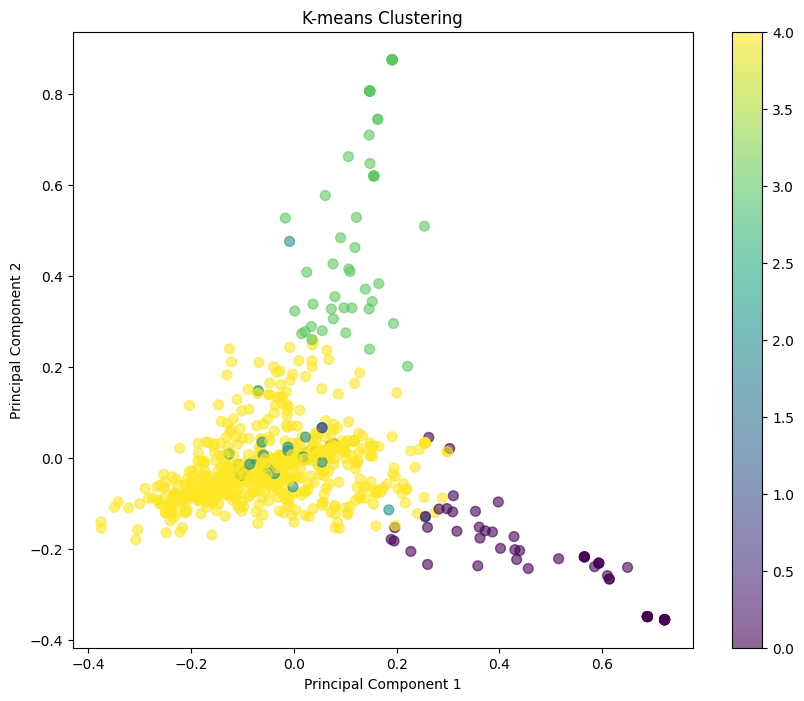


DBSCAN silhouette score: 0.013489617576506895



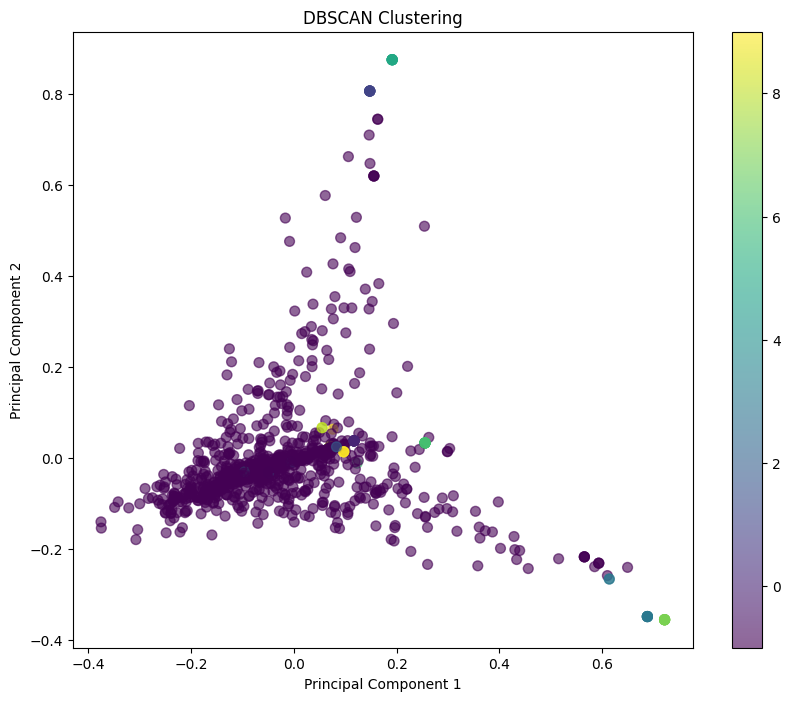


Hierarchical silhouette score: 0.05349796119020714



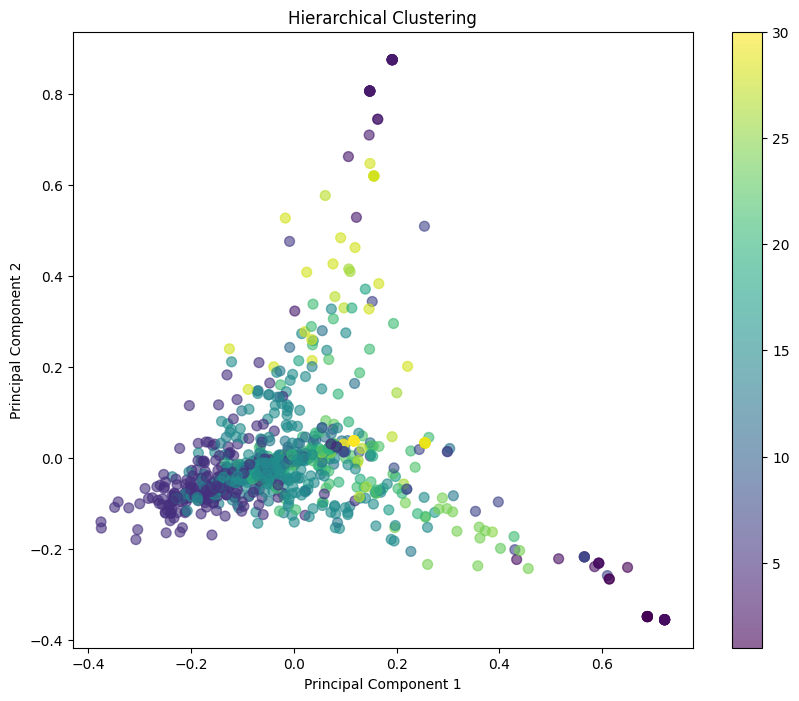


Word2Vec silhouette score: -0.08381592



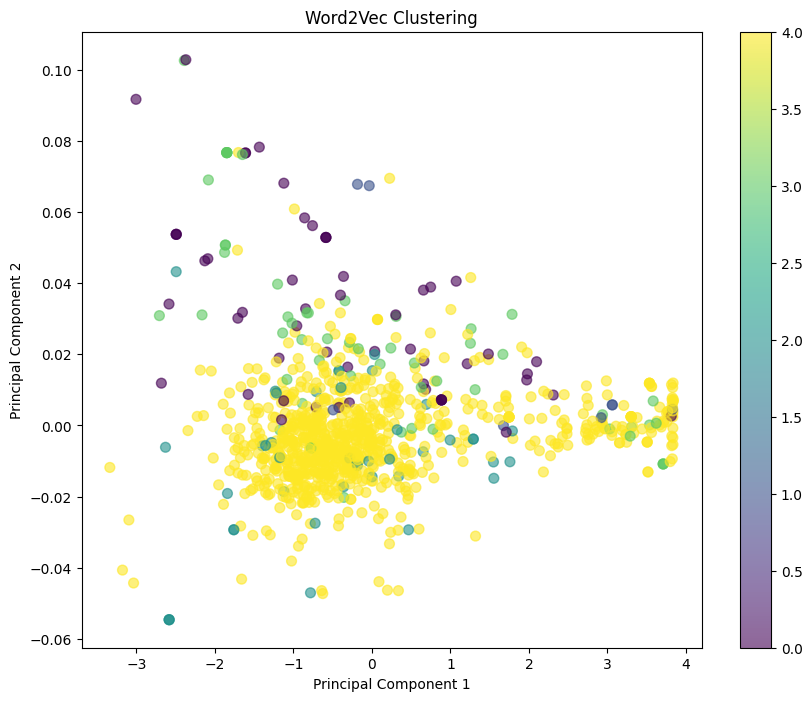


BERT silhouette score: 0.03825193



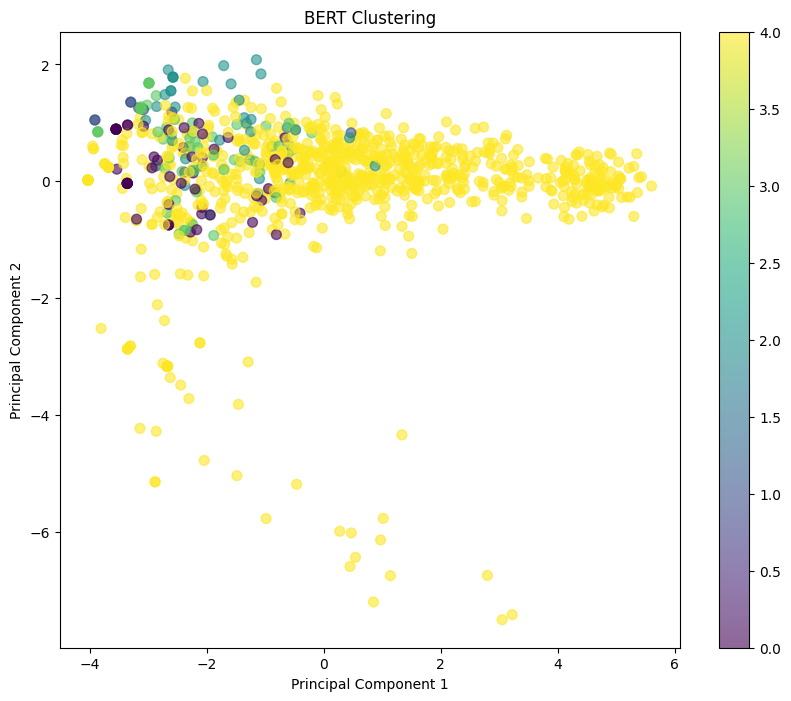

In [16]:
#plotting clusters for K-means
print("K-means silhouette score:", kmeans_silhouette_score) #printing silhouette score
print()
plot_clusters(X, kmeans_labels, title='K-means Clustering')
print()
#plotting clusters for DBSCAN and print silhouette score
print("DBSCAN silhouette score:", dbscan_silhouette_score) #printing silhouette score
print()
plot_clusters(X, dbscan_labels, title='DBSCAN Clustering')
print()

#plotting clusters for Hierarchical Clustering and print silhouette score
print("Hierarchical silhouette score:", hierarchical_silhouette_score) #printing silhouette score
print()
plot_clusters(X, hierarchical_labels, title='Hierarchical Clustering')
print()

#plotting Word2Vec clusters and print silhouette score
print("Word2Vec silhouette score:", word2vec_silhouette_score) #printing silhouette score
print()
plot_embeddings(word_vectors, kmeans_labels, title='Word2Vec Clustering')  # Plot Word2Vec embeddings
print()

#plotting BERT clusters and print silhouette score
print("BERT silhouette score:", bert_silhouette_score) #printing silhouette score
print()
plot_embeddings(bert_embed, kmeans_labels, title='BERT Clustering')  # Plot BERT embeddings
print()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

Based on the results of Question 2, the comparison of clustering techniques reveals distinct patterns in their clustering efficiency and structure. Hierarchical clustering achieved the best silhouette score (0.0535), indicating relatively coherent clusters compared to the others. K-means clustering and BERT embeddings, with silhouette scores of 0.0323 and 0.0383 respectively, show fair clustering quality but still less optimal than hierarchical clustering. DBSCAN, scoring 0.0135, struggled to form meaningful clusters in this dataset, likely due to parameter sensitivity and data density variations. Word2Vec clustering performed the worst, with a negative silhouette score (-0.0880), highlighting poor separability and potential overlap of clusters. Visually, K-means and hierarchical methods show structured grouping, while DBSCAN and Word2Vec exhibit more dispersed and inconsistent patterns. BERT offers a balance between embedding quality and clustering coherence.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [17]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

In this exercise, I gained a deeper understanding of clustering techniques and
how to implement embedding models like Word2Vec and BERT for text data.
I also learned how to evaluate clustering quality with silhouette scores.
It was a great experience that helped my skills in model evaluation.

'''

'\nPlease write you answer here:\n\nIn this exercise, I gained a deeper understanding of clustering techniques and \nhow to implement embedding models like Word2Vec and BERT for text data. \nI also learned how to evaluate clustering quality with silhouette scores. \nIt was a great experience that helped my skills in model evaluation.\n\n'